In [ ]:
import numpy as np 
import pandas as pd 
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *
from fastai.vision.all import cnn_learner
from sklearn.model_selection import train_test_split
import fastai
import matplotlib.pyplot as plt
fastai.__version__

'2.7.10'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/resnet data/
df = pd.read_csv('labels.csv')
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/resnet data


,id,count
0,1,35
1,2,41
2,3,41
3,4,44
4,5,41


In [ ]:
df['id'] = df.id.apply(lambda x: '/content/drive/My Drive/resnet data/frames/seq_{:06d}.jpg'.format(x))
df.columns = ['x','y']
df.head()
print(df)

                                                              x   y
0     /content/drive/My Drive/resnet data/frames/seq_000001.jpg  35
1     /content/drive/My Drive/resnet data/frames/seq_000002.jpg  41
2     /content/drive/My Drive/resnet data/frames/seq_000003.jpg  41
3     /content/drive/My Drive/resnet data/frames/seq_000004.jpg  44
4     /content/drive/My Drive/resnet data/frames/seq_000005.jpg  41
...                                                         ...  ..
1995  /content/drive/My Drive/resnet data/frames/seq_001996.jpg  27
1996  /content/drive/My Drive/resnet data/frames/seq_001997.jpg  27
1997  /content/drive/My Drive/resnet data/frames/seq_001998.jpg  25
1998  /content/drive/My Drive/resnet data/frames/seq_001999.jpg  26
1999  /content/drive/My Drive/resnet data/frames/seq_002000.jpg  26

[2000 rows x 2 columns]


In [ ]:
# def get_x(df): return df['x'] # path to images
# def get_y(df): return df['y'] # labels

# d = DataBlock(blocks=(ImageBlock, RegressionBlock),    # types of input and output
#          get_x = get_x,                                # function to get path to images
#          get_y = get_y,                                # function fo get labels
#          splitter=RandomSplitter(),                    # random splitter (20% for validation)
#          item_tfms=Resize(224, ResizeMethod.Squish),)  # resize and squish images 

def get_x(df): return df['x'] # path to images
def get_y(df): return df['y'] # labels

train, test = train_test_split(df, test_size=0.10)

d = DataBlock(blocks=(ImageBlock, RegressionBlock),    # types of input and output
         get_x = get_x,                                # function to get path to images
         get_y = get_y,                                # function fo get labels
         splitter=RandomSplitter(),                    # random splitter (20% for validation)
         item_tfms=Resize(224, ResizeMethod.Squish),)  # resize and squish images 

dtt = DataBlock(blocks=(ImageBlock, RegressionBlock),    # types of input and output
         get_x = get_x,                                # function to get path to images
         get_y = get_y,                                # function fo get labels
         splitter=RandomSplitter(0),
         item_tfms=Resize(224, ResizeMethod.Squish),)  # resize and squish images


In [ ]:
# dl = d.dataloaders(df)
dl = d.dataloaders(train)

In [ ]:
len(dl.train_ds), len(dl.valid_ds)

(1440, 360)

In [ ]:
d_test = dtt.dataloaders(test).train_ds

In [ ]:
len(d_test)

200

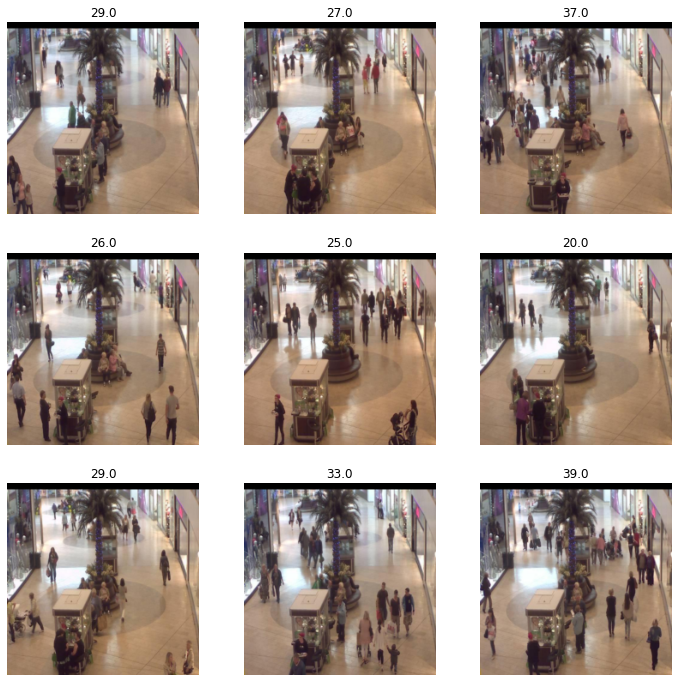

In [ ]:
# Show a batch of images along with their labels.
dl.show_batch(figsize=(12,12))

In [ ]:
model = cnn_learner(dl, models.alexnet ,metrics=[mae])


/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
#@title Default title text
# learn.fine_tune(8, 0.1)
# learn.fine_tune(10, 0.1)
# learn.fit_one_cycle(4)
# learn.fit_one_cycle(4, slice(5e-3,5e-2),cbs=[ShowGraphCallback()])
# model.fit_one_cycle(4, slice(5e-3,5e-2),cbs=[ShowGraphCallback()])
model.fine_tune(30, 2e-3)
# model.fine_tune(25, 3e-05)

epoch,train_loss,valid_loss,mae,time
0,998.807861,976.999451,30.917858,01:06


epoch,train_loss,valid_loss,mae,time
0,964.280151,961.575012,30.748323,00:16
1,952.057800,967.988831,30.892193,00:15
2,943.934753,957.291260,30.749599,00:15
3,933.612976,965.054016,30.904144,00:15
4,916.714539,945.467957,30.599604,00:15
5,892.646362,808.750610,28.293913,00:15
6,855.233276,651.918396,25.358753,00:15
7,801.960510,619.373108,24.695372,00:15
8,727.963867,593.460632,24.168083,00:15
9,636.075806,522.378967,22.631399,00:15


SuggestedLRs(valley=2.0892961401841603e-05)

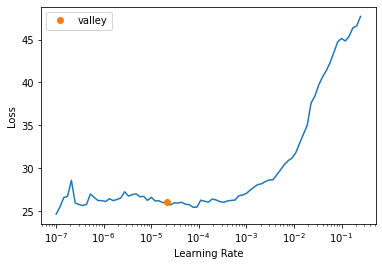

In [ ]:
model.lr_find()
# model.recorder.plot_losses
# model.__dict__

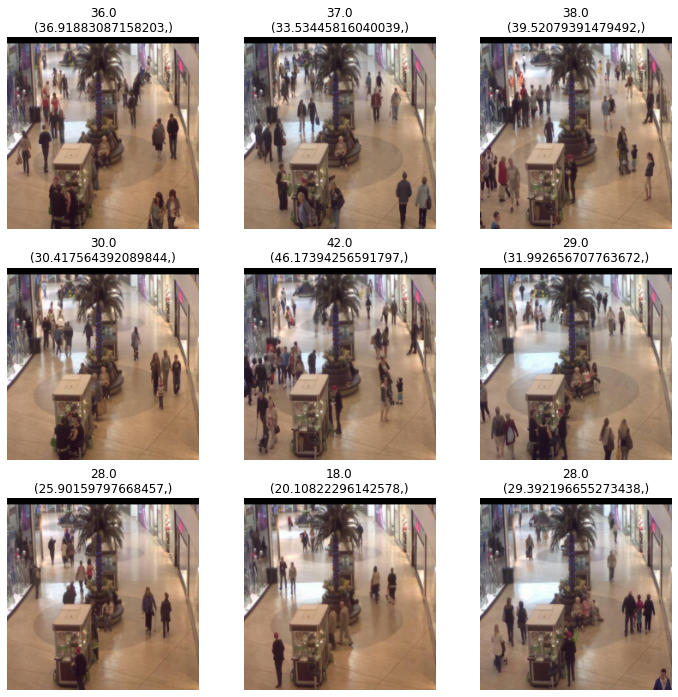

In [ ]:
model.show_results(figsize=(12,12))

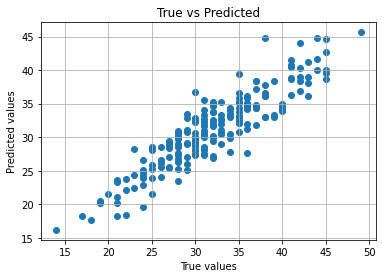

In [ ]:
true_values = []
predicted_values = []

for i in d_test:
  true_values.append(i[1])
  predicted_values.append(model.predict(i[0])[0])

# print(true_values)
# print(predicted_values)

plt.scatter(true_values, predicted_values)
plt.title("True vs Predicted")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.grid(axis='both')
plt.show()

200


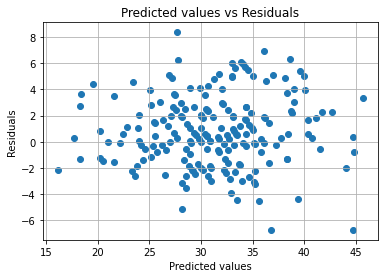

In [ ]:
residuals = [y - x[0] for x,y in zip(predicted_values, true_values)]

print(len(predicted_values))
len(residuals)
plt.scatter(predicted_values, residuals)
plt.title("Predicted values vs Residuals")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.grid(axis='both')
plt.show()

In [ ]:
# model.export()
# path = Path()
# path.ls(file_exts='.pkl')
# model_inf = load_learner(path/'export.pkl')
# model_inf.predict('person.jpeg')